In [101]:
# tosses won and win percentage
# season and toss decision
# teams and toss decision
# venue and toss decision
# winners of ipl in each season
# teams without dl decisions

In [102]:
import pandas as pd

In [103]:
mat=pd.read_csv(r"C:\Users\DELL3521\Desktop\matches.csv")
mat

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,4/9/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,4/9/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,4/10/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,4/11/2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,4/12/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [104]:
mat.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

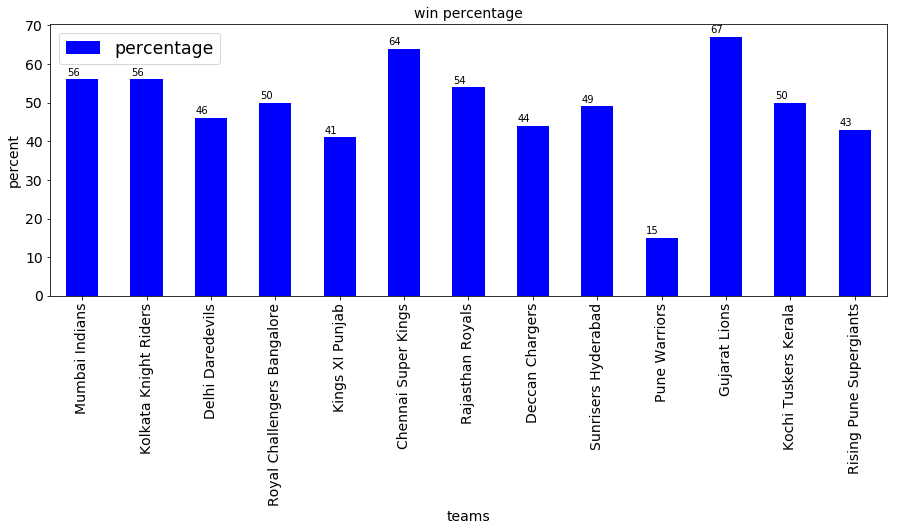

In [105]:
# tosses won and win percentage

toss_wins=mat['toss_winner'].value_counts()

wins=mat.loc[(mat['toss_winner']==mat['winner'])].toss_winner.value_counts()

toss_wins=pd.DataFrame(toss_wins)

toss_wins['wins']=wins

w=toss_wins.reset_index()

winpercent=w.rename(columns={'index':'teams'})

f=winpercent['wins']/winpercent['toss_winner']

g=pd.DataFrame(f)

def func(x):
    return float(format(x, '.2f'))

p=g.applymap(func)
p=p*100

winpercent['percentage']=p

toss=winpercent.rename(columns={'toss_winner':'tosses won'})

toss.drop(toss.index[[13]], inplace=True)

toss['percentage']=toss['percentage'].astype('int')

toss.set_index('teams',inplace=True)

import matplotlib.pyplot as plt
% matplotlib inline

ax = toss.percentage.plot(kind ='bar',figsize=(15,5),color='b')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.01, p.get_height()+ 1))
plt.title("win percentage",fontsize=14)
plt.xlabel("teams",fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('percent',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize ='xx-large')
plt.show()

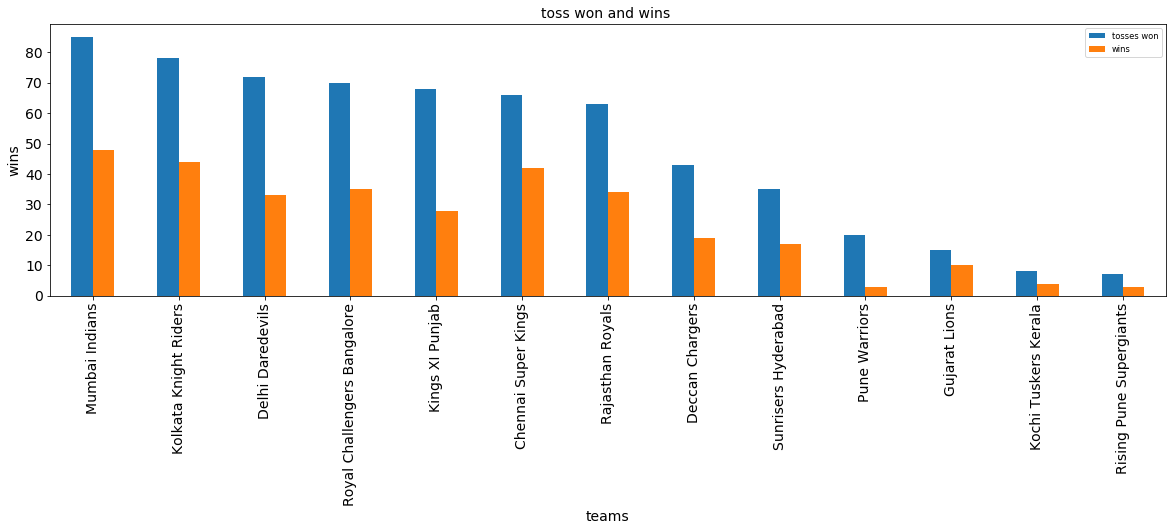

In [106]:
toss.iloc[:,:-1].plot(kind='bar',figsize=(20,5))
plt.title("toss won and wins ",fontsize=14)
plt.xlabel("teams",fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('wins',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize ='small')
plt.show()

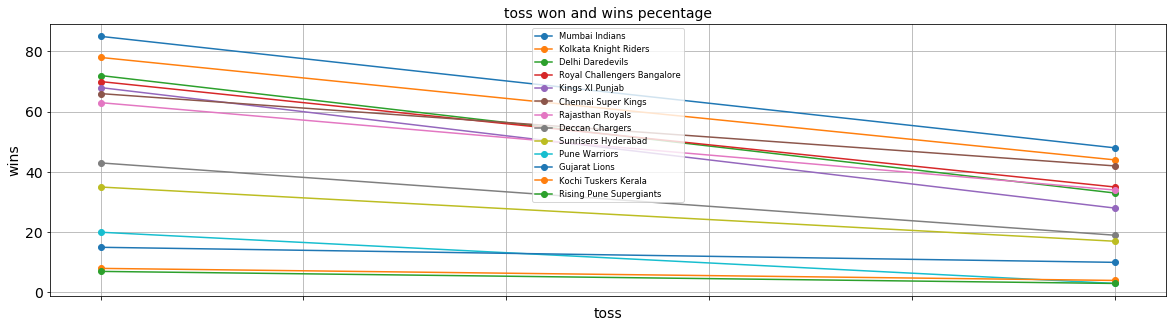

In [107]:
toss1=toss.T

toss1.iloc[:-1,:].plot(figsize=(20,5),marker='o',grid=True)
plt.title("toss won and wins pecentage",fontsize=14)
plt.xlabel("toss",fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('wins',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize ='small')
plt.show()

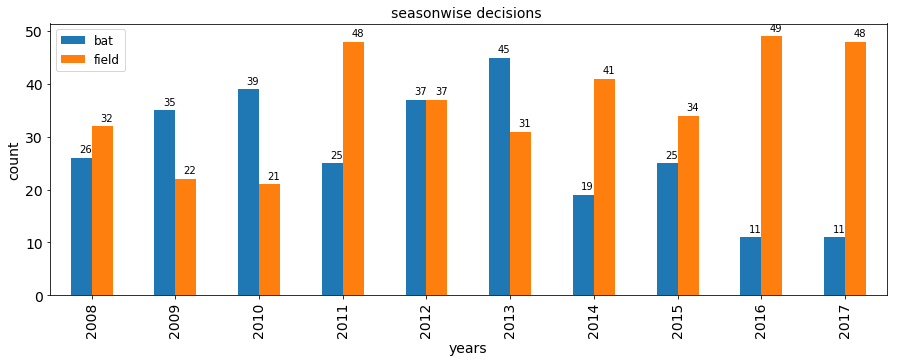

In [108]:
# season-wise toss decision

seasonwise=mat.pivot_table(values='city', index='season', columns='toss_decision', aggfunc=len)

ax = seasonwise.plot(kind ='bar',figsize=(15,5))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+ 1))
plt.title("seasonwise decisions ",fontsize=14)
plt.xlabel("years",fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('count',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize ='large')
plt.show()

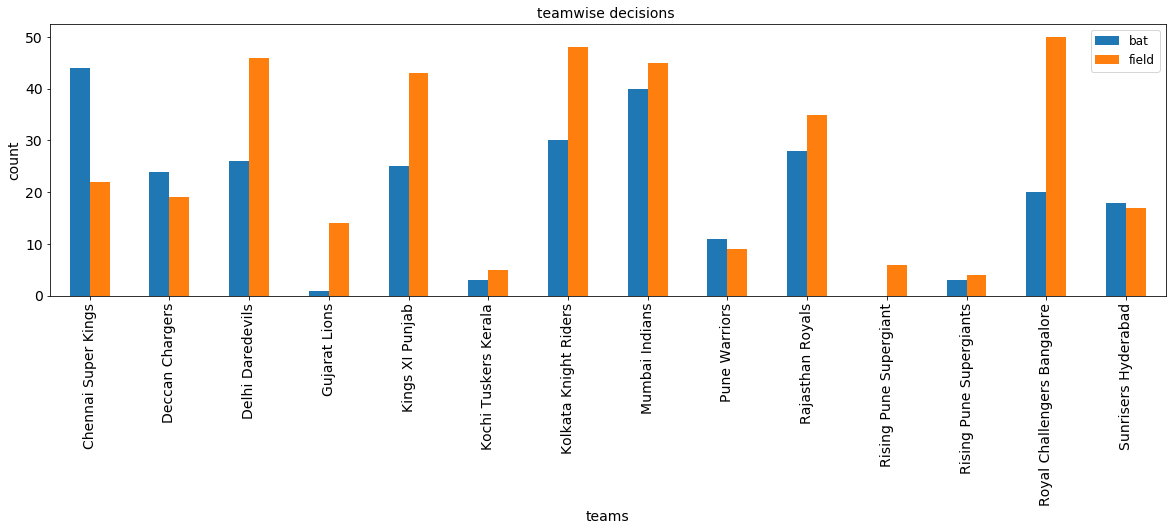

In [109]:
# team-wise toss decision

teamwise=pd.crosstab(mat.toss_winner,mat.toss_decision)

teamwise.plot(kind='bar',figsize=(20,5))
plt.title("teamwise decisions ",fontsize=14)
plt.xlabel("teams",fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('count',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize ='large')
plt.show()

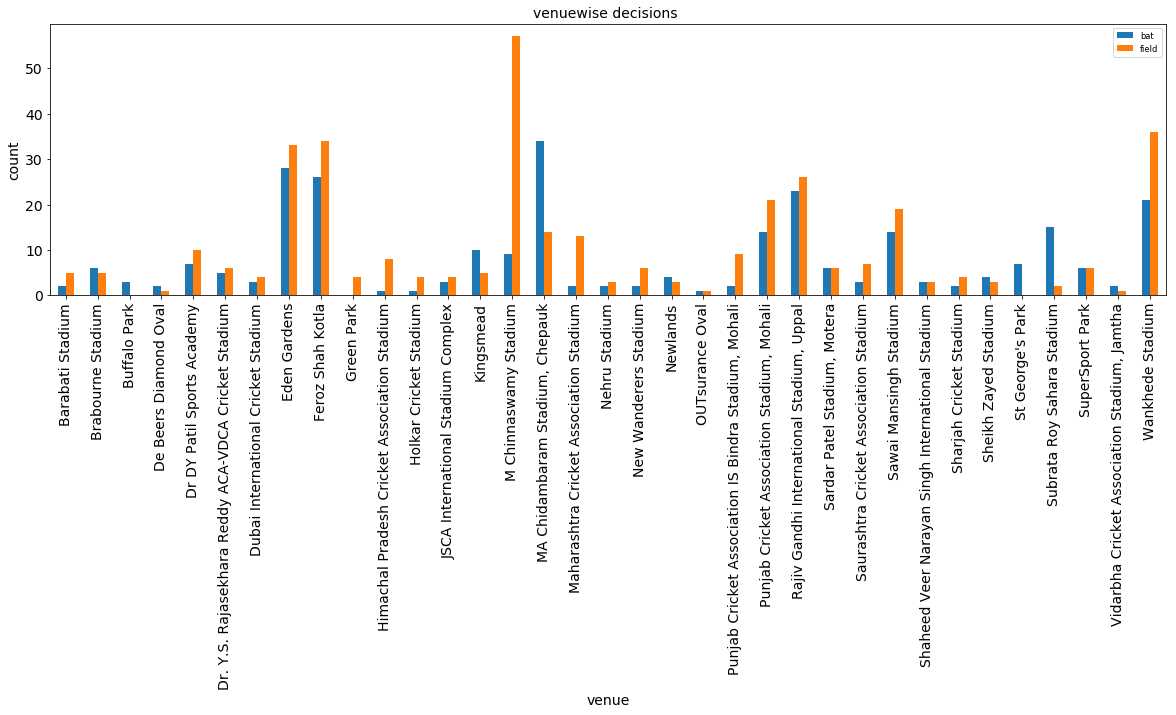

In [110]:
# venue-wise toss decision

venuewise=pd.crosstab(mat.venue,mat.toss_decision)

venuewise.plot(kind='bar',figsize=(20,5))
plt.title("venuewise decisions ",fontsize=14)
plt.xlabel("venue",fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('count',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize ='small')
plt.show()

In [111]:
# winner of each season

mat.drop_duplicates(['season'],keep='last')[['season','winner']]

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


In [112]:
# teams without dl methods

teamdl=mat.loc[mat['dl_applied']==1][['team1','team2']]

teamdl1=teamdl.melt()

teamdl1['value'].value_counts()

fd=mat[['team1','team2']]

fd1=fd.melt()

fd1['value'].value_counts()

fd2=fd1.loc[~fd1['value'].isin(['Sunrisers Hyderabad', 'Delhi Daredevils', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kochi Tuskers Kerala'])]

fd2['value'].value_counts()

Mumbai Indians            157
Rajasthan Royals          118
Deccan Chargers            75
Pune Warriors              46
Gujarat Lions              30
Rising Pune Supergiant     16
Name: value, dtype: int64

In [113]:
A = set(list(mat.team1.values) + list(mat.team2.values))
B = set(list(mat.loc[mat.dl_applied == 1].team1.values) + list(mat.loc[mat.dl_applied == 1].team2.values))
A - B

{'Deccan Chargers',
 'Gujarat Lions',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant'}